In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


In [2]:

data = {
    "Name": ["Ali", "Sara", "Reza", "Maryam", "Omid", "Neda"],
    "Age": [25, 30, 22, 28, 35, 27],
    "Height": [175, 160, 180, 165, 170, 168],
    "Score": [80, 75, 85, 78, 90, 82]  
}

df = pd.DataFrame(data)
print(df)


     Name  Age  Height  Score
0     Ali   25     175     80
1    Sara   30     160     75
2    Reza   22     180     85
3  Maryam   28     165     78
4    Omid   35     170     90
5    Neda   27     168     82


In [3]:
X = df.drop(['Score', 'Name'], axis= 1)
y = df['Score']
print(X.shape, y.shape)

(6, 2) (6,)


In [4]:
X.head

<bound method NDFrame.head of    Age  Height
0   25     175
1   30     160
2   22     180
3   28     165
4   35     170
5   27     168>

In [5]:
one = OneHotEncoder(sparse_output= False)
encoded = one.fit_transform(df[['Name']])

In [6]:
encoded.shape

(6, 6)

In [7]:
encoded_df = pd.DataFrame(encoded, columns= one.get_feature_names_out(['Name']))


In [8]:
encoded_df.head()

,Name_Ali,Name_Maryam,Name_Neda,Name_Omid,Name_Reza,Name_Sara
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0


In [9]:
print(encoded_df.isnull().sum())

Name_Ali       0
Name_Maryam    0
Name_Neda      0
Name_Omid      0
Name_Reza      0
Name_Sara      0
dtype: int64


In [10]:
X = pd.concat([X, encoded_df], axis= 1)

print(X.shape)
X.head()

(6, 8)


,Age,Height,Name_Ali,Name_Maryam,Name_Neda,Name_Omid,Name_Reza,Name_Sara
0,25,175,1.0,0.0,0.0,0.0,0.0,0.0
1,30,160,0.0,0.0,0.0,0.0,0.0,1.0
2,22,180,0.0,0.0,0.0,0.0,1.0,0.0
3,28,165,0.0,1.0,0.0,0.0,0.0,0.0
4,35,170,0.0,0.0,0.0,1.0,0.0,0.0


# Definition of NN with numpy

In [11]:
w11 = np.random.randn(8, 16)
b11 = np.zeros((1, 16))
w22 = np.random.randn(16,1)
b22 = np.zeros((1, 1))

In [12]:
print(w11.shape, w22.shape)

(8, 16) (16, 1)


Sigmoid and Relu function 

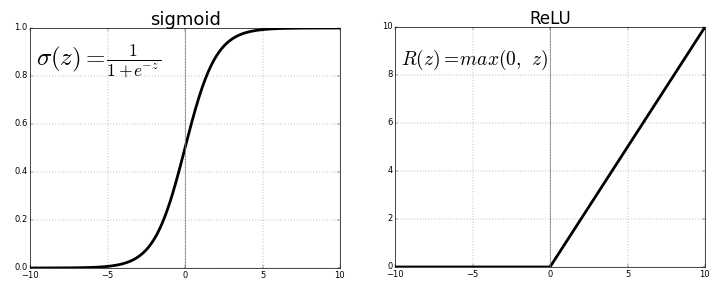
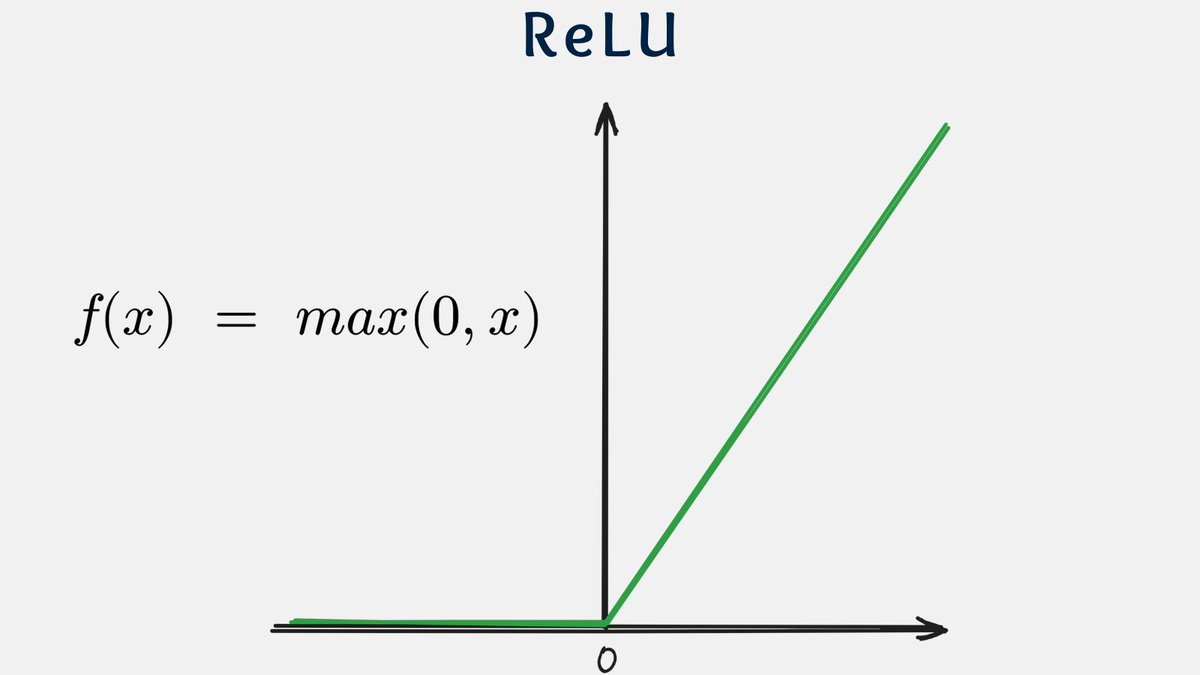

In [13]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1+ np.exp(-x))

def relu_derivative(x):
    return (x > 0).astype(float)

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

In [14]:
def forward_propagation(X):

    layer1 = np.dot(X, w11) + b11
    A1 = relu(layer1)
    layer2 = np.dot(A1, w22) + b22
    A2 = sigmoid(layer2)

    return A1 , A2


    


In [15]:
y = y.values.reshape(-1, 1) /100


In [16]:
print(y.shape)

(6, 1)


In [17]:
def cost_compute(A2, y):
    cost = np.mean((y - A2) **2)
    return np.squeeze(cost)


In [18]:
def backward_propagation(X, y, A1, A2, w22):
    dA2 = (y - A2) * sigmoid_derivative(A2)
    dw22 = np.dot(A1.T, dA2)
    db2 = np.sum(dA2, axis=0, keepdims=True)

    dA1 = np.dot(dA2, w22.T) * sigmoid_derivative(A1)
    dw11 = np.dot(X.T, dA1)
    db1 = np.sum(dA1, axis=0, keepdims=True)

    return dw11, db1, dw22, db2

    

In [22]:

def train(X, y, epochs=1000, lr=0.01):
    global w11, b11, w22, b22  

    for epoch in range(epochs):
        # forward
        A1, A2 = forward_propagation(X)

        # cost
        loss = cost_compute(A2, y)

        # backward
        dw11, db1, dw22, db2 = backward_propagation(X, y, A1, A2, w22)

        # update
        w11 += lr * dw11
        b11 += lr * db1
        w22 += lr * dw22
        b22 += lr * db2

        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

    return w11, b11, w22, b22


In [25]:
train(X, y, epochs=100, lr=0.0001)

Epoch 0, Loss: 0.6693
Epoch 10, Loss: 0.0263
Epoch 20, Loss: 0.0262
Epoch 30, Loss: 0.0262
Epoch 40, Loss: 0.0262
Epoch 50, Loss: 0.0262
Epoch 60, Loss: 0.0262
Epoch 70, Loss: 0.0262
Epoch 80, Loss: 0.0262
Epoch 90, Loss: 0.0263


(array([[-0.75161923,  0.36512244,  0.41053183,  0.56470085,  0.02383623,
         -0.91496899, -0.33034812,  0.18689833, -0.80551867,  1.48057674,
         -2.18227272, -1.29217373, -0.72221695, -0.38455056,  2.91290839,
         -1.19610586],
        [-0.36551097,  0.82815564,  1.13814793,  0.09326083,  1.55382257,
          0.63620616,  0.17719863, -1.19333405,  0.4604028 ,  0.58463633,
          0.06343199,  0.51980936, -1.43825208,  0.36430741,  0.33966293,
          0.37958287],
        [-0.83475446,  0.04131847, -0.30678664,  0.21391057, -1.76884535,
          0.4882315 ,  0.1227143 ,  0.26196356,  0.01351095, -0.0415391 ,
          0.88199832,  0.2922133 ,  0.54333993, -0.2153906 ,  0.25080419,
          0.16474471],
        [ 0.51629646, -0.31129462,  0.86121248, -1.74968743,  1.60323282,
         -1.09422033, -0.35326061,  0.29504217,  0.11345157,  0.25931503,
         -0.78651944,  0.26097807,  0.79456789, -0.20564538, -0.69564497,
         -0.96993195],
        [ 1.01353342